# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Getting the data

In [4]:
churn_data = pd.read_csv('churn.csv')

In [6]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Checking for missing data

In [11]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# Converting Total Charges to a numerical data type.
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges)
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing data in TotalCharges so let's remove those

In [18]:
#Removing missing values 
churn_data.dropna(inplace = True)

#Removing customer IDs from the data set
df2 = churn_data.iloc[:,1:]

#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


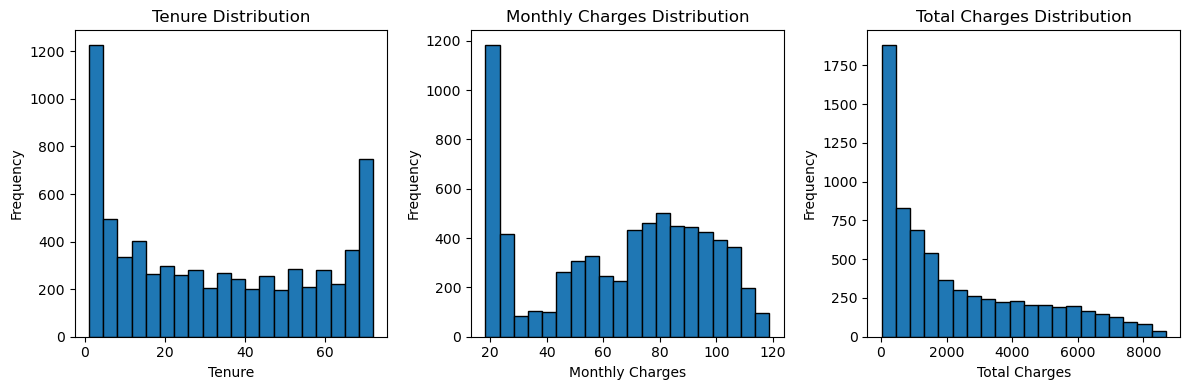

In [22]:
plt.figure(figsize=(12, 4))

# Histogram for tenure
plt.subplot(1, 3, 1)
plt.hist(churn_data['tenure'], bins=20, edgecolor='k')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')

# Histogram for MonthlyCharges
plt.subplot(1, 3, 2)
plt.hist(churn_data['MonthlyCharges'], bins=20, edgecolor='k')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')

# Histogram for TotalCharges
plt.subplot(1, 3, 3)
plt.hist(churn_data['TotalCharges'], bins=20, edgecolor='k')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

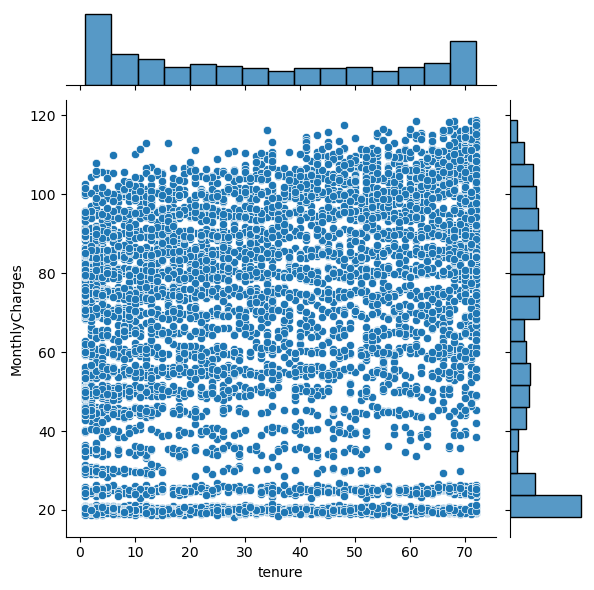

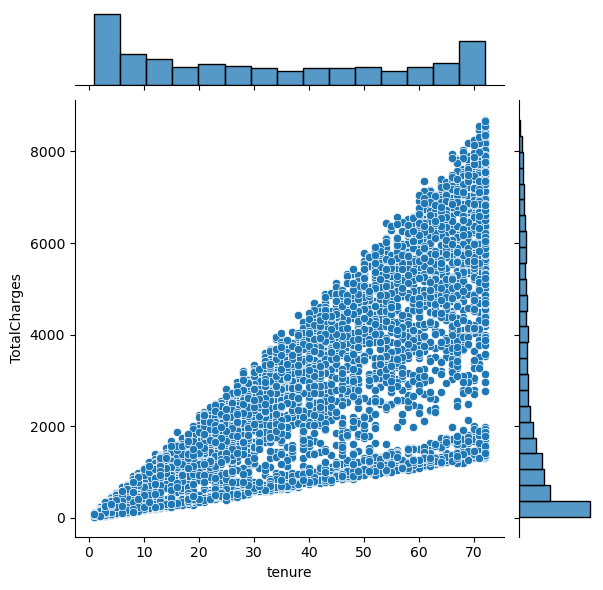

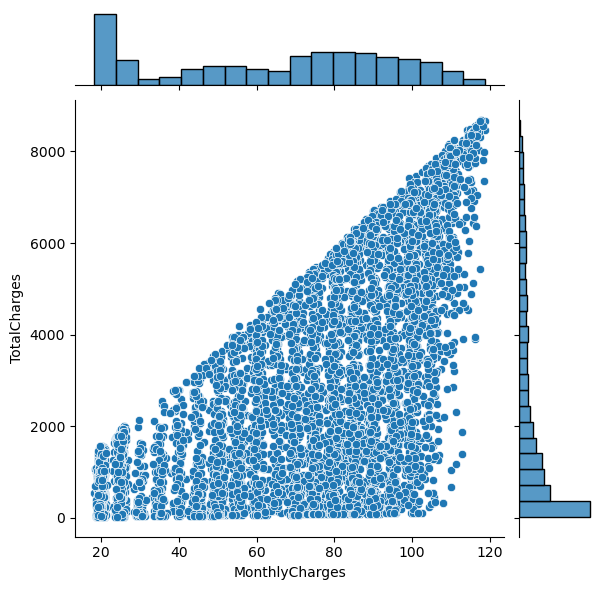

In [24]:
sns.jointplot(x='tenure', y='MonthlyCharges', data=churn_data, kind='scatter')

#Jointplot for 'tenure' and 'TotalCharges'
sns.jointplot(x='tenure', y='TotalCharges', data=churn_data, kind='scatter')

#Jointplot for 'MonthlyCharges' and 'TotalCharges'
sns.jointplot(x='MonthlyCharges', y='TotalCharges', data=churn_data, kind='scatter')

plt.show()

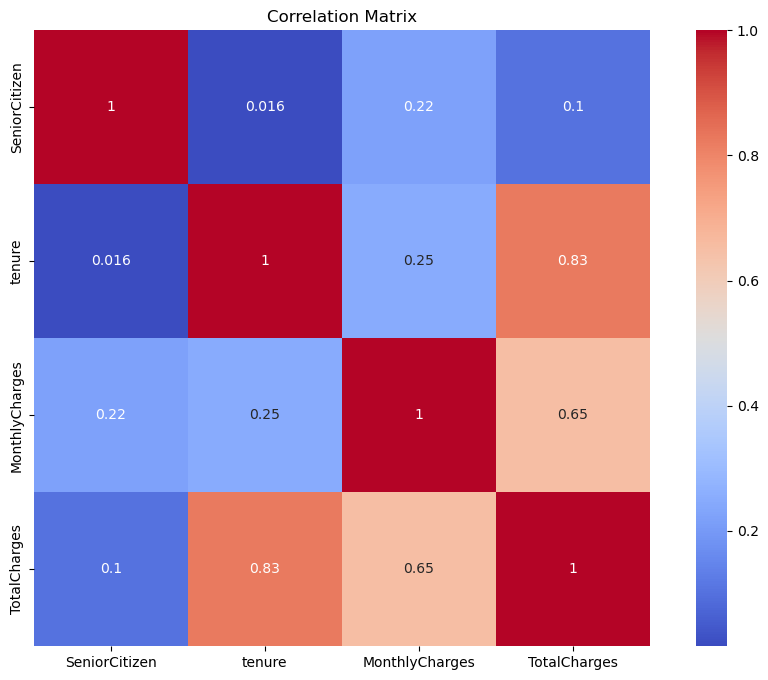

In [26]:
#Computing the correlation matrix
correlation_matrix = churn_data.corr()

#Generating a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

plt.show()

# Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [60]:
#Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Predictions and Evalutions

In [64]:
predictions = model.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print((confusion_matrix(y_test,predictions)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1734
           1       0.64      0.56      0.59       587

    accuracy                           0.81      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321

[[1549  185]
 [ 261  326]]
